In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

import yfinance as yf

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
plt.style.use('fivethirtyeight')
print('All good!')

All good!


In [2]:
BTC_Ticker = yf.Ticker("BTC-USD")
df = BTC_Ticker.history(period="max")

In [3]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-04 00:00:00+00:00,29031.304688,29353.185547,28694.039062,28847.710938,15548678514,0.0,0.0
2023-05-05 00:00:00+00:00,28851.480469,29668.908203,28845.509766,29534.384766,17936566518,0.0,0.0
2023-05-06 00:00:00+00:00,29538.859375,29820.126953,28468.966797,28904.623047,15913866714,0.0,0.0


Text(0, 0.5, 'Close Proce USD ($)')

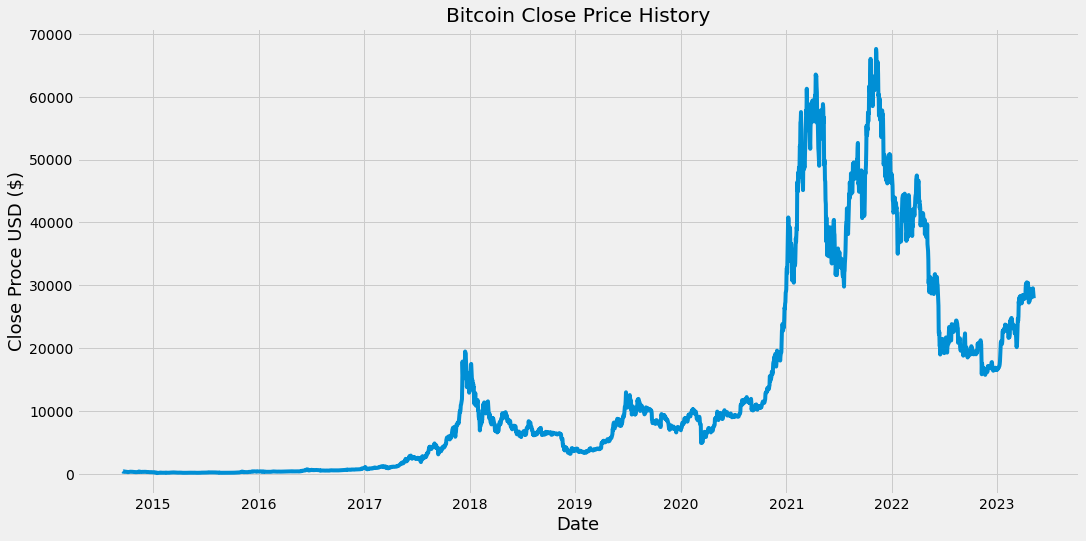

In [4]:
plt.figure(figsize=(16,8))
plt.title('Bitcoin Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18 )
plt.ylabel("Close Proce USD ($)", fontsize = 18)

In [20]:
data = df.filter(['Close'])
# Convert the dataframe toa numpy array
dataset=data.values
# get the number of rows to train the model 
traning_data_len = math.ceil(len(dataset) *.8)
traning_data_len

2525

In [10]:
# Scale the data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.42628081],
       [0.41960841],
       [0.41228189]])

In [11]:
# creating the traning dataset 
# creat the scaled traning dataset
# contain all of the data from the index 0 to traning_data_len getting all the columns
train_data = scaled_data[0:traning_data_len, :]

# split the data into x_train and y_train 

# x_train is idependent traning variables or traning features
x_train = []

# y-train dependent variables or target variables
y_train = []

# append the past 60 avalues to x_train dataset
#not including i. will contain 60 values indexed to 0 to position 5
# will contain de 60 value indexed
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

x_train dataset and y_train dataset. The second array begins with the second value. The last 2 values are y_train dataset

In [12]:
# converting x_train and y-train to numpy arrays to use in the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)


Reshape the data: LSTM expects the input to be three-dimensional. Number of samples, time steps and number of features

In [13]:
# Reshape

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
# 2463samples, 60 time steps and 1 feature 'Close' price
x_train.shape

(2465, 60, 1)

## build the LSTM Model

In [14]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(x_train.shape[1],1))) # 50 NEURONS 
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [17]:
# Complie the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(x_train,y_train, batch_size=1, epochs=1) 
# batch_size = total number of traning examples present in a single batch
# epochs = number interations when an entire data set is passed forward and backward through a neural network

2465/2465 [==============================] - 102s 39ms/step - loss: 0.0013


In [22]:
# Testing dataset 
# new array containing scaled values 
test_data = scaled_data[traning_data_len - 60:, : ]
# data sets x_test and y_test
x_test = []
y_test = dataset[traning_data_len: ,:]

for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [23]:
# converting the data to a numpy array
x_test = np.array(x_test)

In [24]:
# reshaping 
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [25]:
# Model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


20/20 [==============================] - 2s 23ms/step


In [26]:
# root mean squared error (RMSE) - accuracy of the model - standard deviation od the residuals
# a lower value indicates a better fit
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1291.9330335033676

## plot  the data

<ipython-input-72-e4dff6d9b690>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


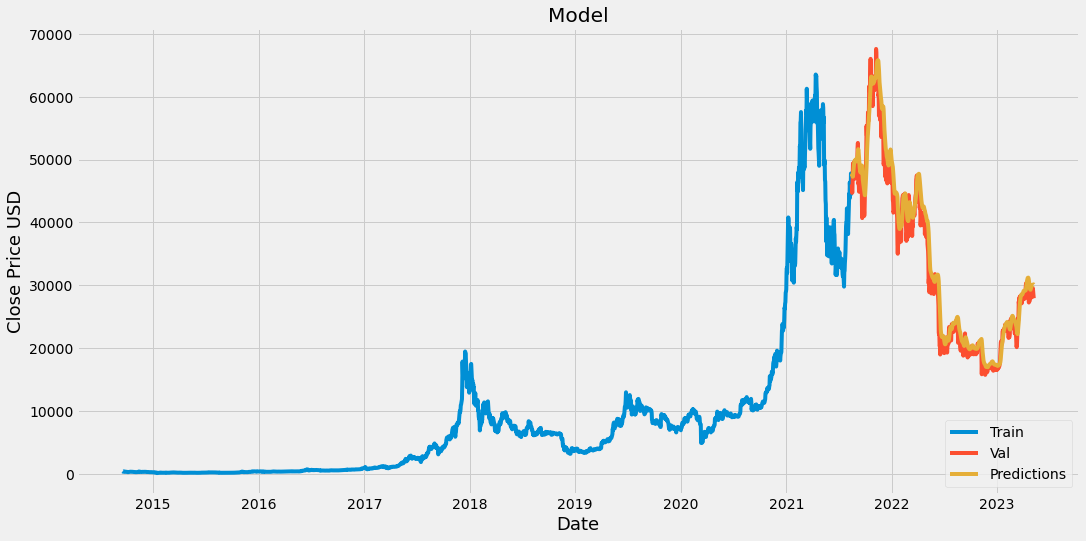

In [72]:
train = data[:traning_data_len]
valid = data[traning_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-08-16 00:00:00+00:00,46004.484375,47346.753906
2021-08-17 00:00:00+00:00,44695.359375,47547.929688
2021-08-18 00:00:00+00:00,44801.187500,47453.406250
2021-08-19 00:00:00+00:00,46717.578125,47260.601562
2021-08-20 00:00:00+00:00,49339.175781,47301.691406
...,...,...
2023-05-04 00:00:00+00:00,28847.710938,30034.427734
2023-05-05 00:00:00+00:00,29534.384766,30036.347656
2023-05-06 00:00:00+00:00,28904.623047,30125.023438


In [32]:
# Geting the quote 
btc_quote = df.filter(['Close'])

#Geting the last 60 day closing price values and coverting the dataframe to an array
last_60_days = btc_quote[-60:].values

#Scale the date
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
# append past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#reshape
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

# Get the predicted scaled price

pred_price = model.predict(X_test)

# unscaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 41ms/step
[[29970.238]]


In [35]:
df['Close'].tail(1)

Date
2023-05-08 00:00:00+00:00    27961.253906
Name: Close, dtype: float64

In [84]:

# Getting the quote
btc_quote = df.filter(['Close'])

# Getting the last 60-day closing price values and converting the DataFrame to an array
last_60_days = btc_quote[-60:].values

# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
# Append past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled prices for the next 7 days
pred_prices = []
pred_dates = []
for _ in range(7):
    pred_price = model.predict(X_test)
    pred_prices.append(pred_price[0][0])
    
    # Update the input data by shifting it and adding the new prediction
    X_test = np.roll(X_test, -1, axis=1)
    X_test[0, -1, :] = pred_price
    
    # Generate the date for the next prediction
    next_date = btc_quote.index[-1] + pd.DateOffset(days=1)
    pred_dates.append(next_date)
    btc_quote = btc_quote.append(pd.DataFrame({'Close': [pred_price[0][0]]}, index=[next_date]))

# Unscale the predicted prices
pred_prices = scaler.inverse_transform(np.array(pred_prices).reshape(-1, 1))

# Creating a DataFrame with the predicted prices and dates
predictions_df = pd.DataFrame({'Date': pred_dates, 'Predicted Price': pred_prices.flatten()})

# Print the predicted prices and dates for the next 7 days
print(predictions_df)

1/1 [==============================] - 0s 20ms/step
                       Date  Predicted Price
0 2023-05-09 00:00:00+00:00     29970.238281
1 2023-05-10 00:00:00+00:00     30055.791016
2 2023-05-11 00:00:00+00:00     30246.083984
3 2023-05-12 00:00:00+00:00     30488.001953
4 2023-05-13 00:00:00+00:00     30754.318359
5 2023-05-14 00:00:00+00:00     31031.484375
6 2023-05-15 00:00:00+00:00     31313.044922


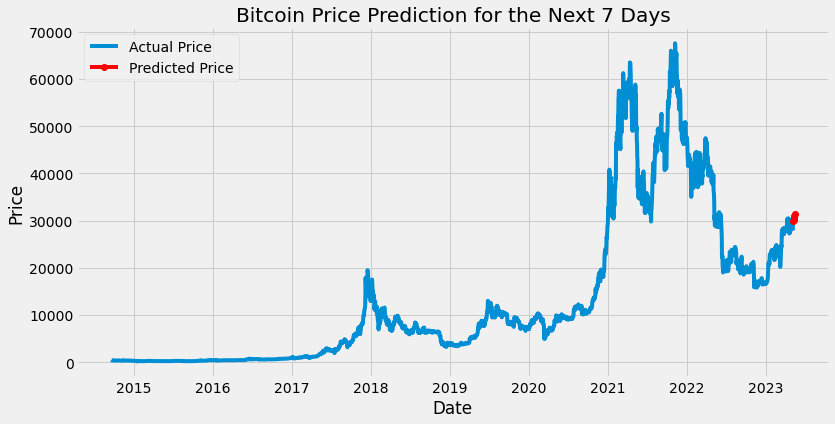

In [90]:
# Plotting the chart
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Price')
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], marker='o', color='red', label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction for the Next 7 Days')
plt.legend()
plt.grid(True)
plt.show()

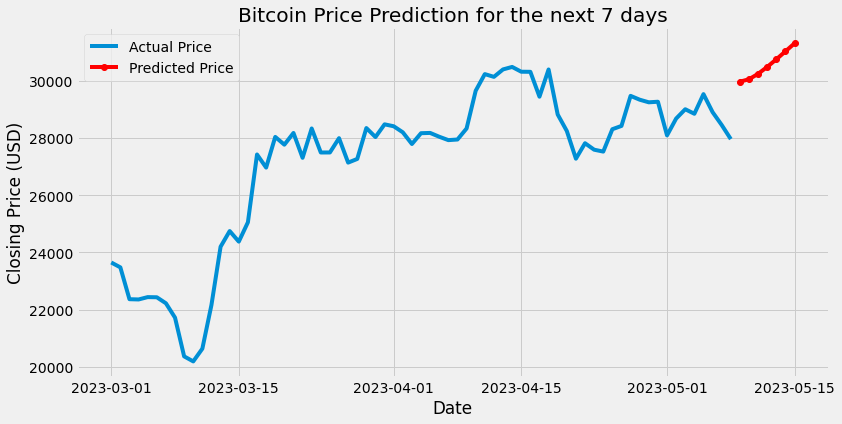

In [98]:
filtered_data = df[df.index >= '2023-03-01']

# Plot the chart
plt.figure(figsize=(12, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label='Actual Price')
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], marker='o', color='red', label='Predicted Price')
plt.title('Bitcoin Price Prediction for the next 7 days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()